##### Read library

In [14]:
import kaos
import random
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


##### Read e.coli file

In [15]:
file_path_ecoli_original = "562.57163.fna"

##### function to shuffle A,C,G, T across the DNA

In [16]:
def random_permutation_with_count_preserved(input_string):
    unique_chars = sorted(set(input_string))
    char_counts = {char: input_string.count(char) for char in unique_chars}
    print("The character counts is: ", char_counts)
    
    permuted_chars = []
    
    for char in unique_chars:
        permuted_chars.extend([char] * char_counts[char])
    
    random.shuffle(permuted_chars)
    
    permuted_string = ''.join(permuted_chars)
    return permuted_string

##### Read original fasta file

In [17]:
original_ecoli_fasta = kaos.Read().read_fasta_removing_non_atgc(file_path_ecoli_original)

##### generate fake fasta by random permutation while preserving indiviaual nucleotide count

In [18]:

permuted_string1 = random_permutation_with_count_preserved(original_ecoli_fasta)

The character counts is:  {'A': 1348446, 'C': 1394315, 'G': 1367469, 'T': 1338352}


In [19]:
print("The nucleotide count in original sequence is: ")
pd.Series(list(original_ecoli_fasta)).value_counts()

The nucleotide count in original sequence is: 


C    1394315
G    1367469
A    1348446
T    1338352
Name: count, dtype: int64

##### generate FCGR

In [26]:
kmer_length=10
fcgr_sequence_ecoli_original = kaos.kaos_fcgr().return_fcgr_matrix(fasta_string= original_ecoli_fasta, kmer_length=kmer_length,  pseudo_count=True)
fcgr_sequence_ecoli_fake = kaos.kaos_fcgr().return_fcgr_matrix(fasta_string= permuted_string1, kmer_length=kmer_length,  pseudo_count=True)

In [28]:
fcgr_sequence_ecoli_original.ravel(), fcgr_sequence_ecoli_fake.ravel()

(array([ 1.,  2.,  1., ..., 14.,  3.,  1.]),
 array([10., 11.,  8., ...,  2.,  6.,  6.]))

##### Create density plot of FCGR for both fake and real

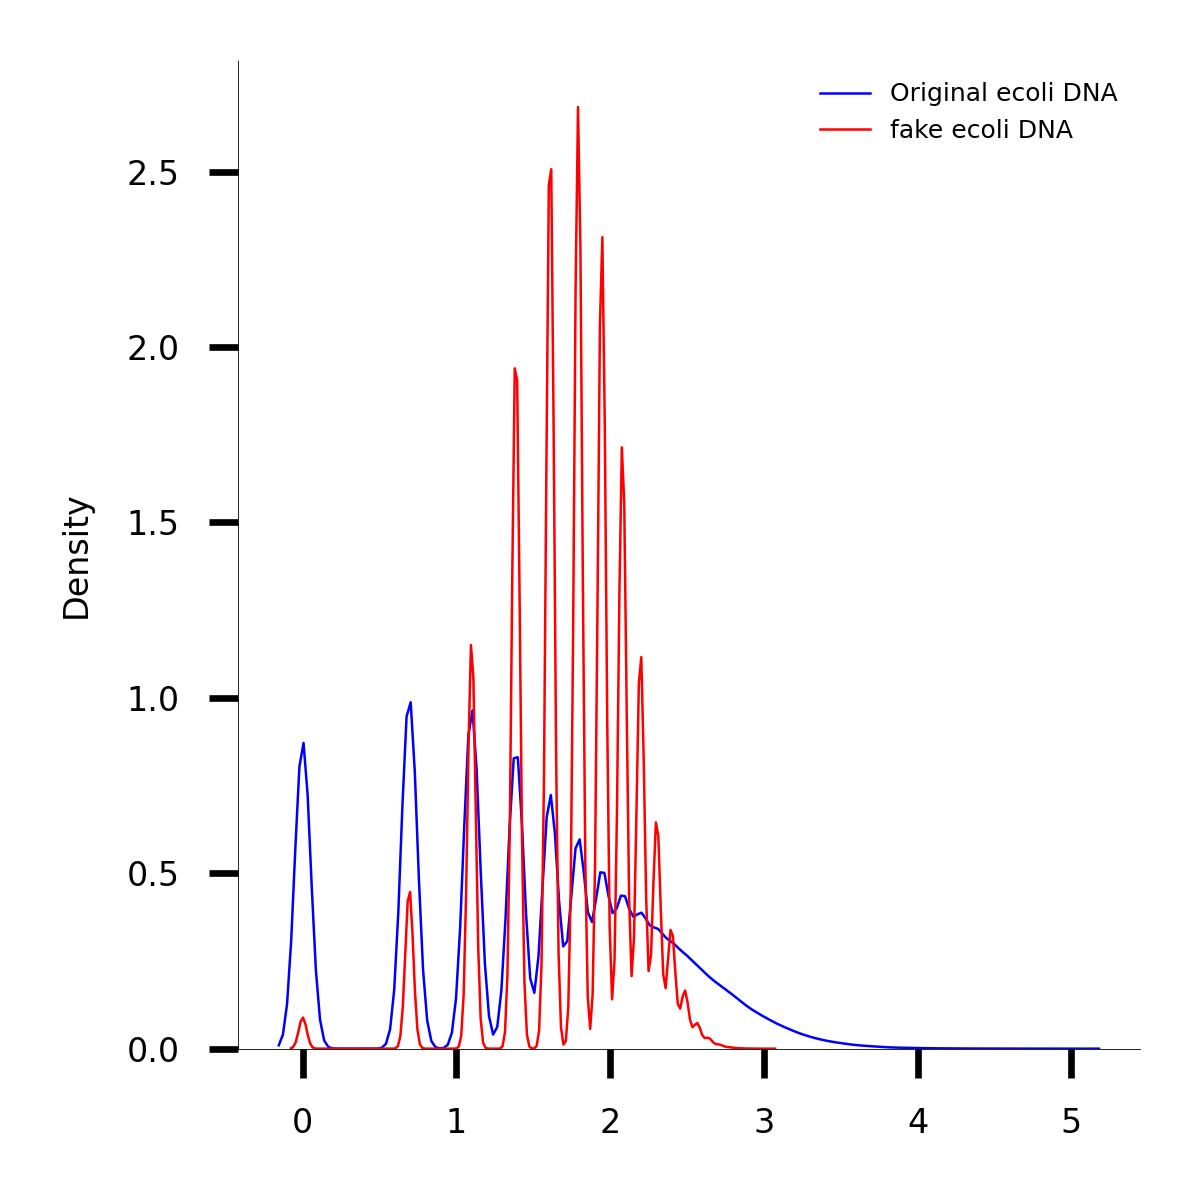

In [52]:

fig, ax = plt.subplots(1,1, figsize = (2.1,2.1), dpi= 600)

sns.kdeplot(np.log(fcgr_sequence_ecoli_original.ravel()), label='Original ecoli DNA', ax = ax, lw = 0.3, c = "blue") 
sns.kdeplot(np.log(fcgr_sequence_ecoli_fake.ravel()), label='fake ecoli DNA', ax = ax, lw = 0.3, c = "red") # Primates

legend = ax.legend(fontsize = 3)

ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')

ax.spines['top'].set_color('white')
ax.spines['right'].set_color('white')
# ax.set_xlabel('-10*log(probability of kmer)')    
legend.get_frame().set_edgecolor('white')    
ax.tick_params(axis='x',  labelsize=4)
ax.tick_params(axis='y',  labelsize=4)
# ax.set_ylim(0, 0.05001)
# ax.set_xlim(50, 250.001)
ax.xaxis.label.set_fontsize(4)
ax.yaxis.label.set_fontsize(4)
# ax.axhline(y=0, color='black', linewidth=1, linestyle='--', color = "black")
# ax.axvline(x=0, color='black', linewidth=1, linestyle='--', color = "black")
spine_width = 0.1
for spine in ax.spines.values():
    spine.set_linewidth(spine_width)
plt.tight_layout()
plt.savefig("Fake FCGR DNA ecoli final.pdf", dpi = 600, bbox_inches="tight")